# 0 - Introdução
## O problema à seguir é um problema de regressão, onde o objetivo final é prever a produtividade de cana-de-açucar, baseada nos dados de entrada. Os dados de entrada podem ser divididos em; dados de solo, dados de planta, dados de fertilidade e informaçõoes geográficas da área.

# 0.1 Objetivo
## O conteúdo neste notebook será utilizado posteriormente para realização de um deploy relacionado à predição da produtividade da cana-de-açúcar. Neste notebook será possível escolher o melhor modelo de regressão, tratamento das variáveis e escolha das features que posteriormente irão fazer parte do sistema em produção.

# 1 - Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("Dataset.csv")

# 2 - Análise exploratória dos dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PONTO          555 non-null    object 
 1   X (m)          555 non-null    float64
 2   Y (m)          555 non-null    float64
 3   Elevation (m)  555 non-null    float64
 4   Slope (%)      555 non-null    float64
 5   Mill           555 non-null    object 
 6   Season         555 non-null    object 
 7   Clay           555 non-null    float64
 8   Sand           555 non-null    float64
 9   Silt           555 non-null    float64
 10  OM             555 non-null    float64
 11  pH             555 non-null    float64
 12  P              555 non-null    float64
 13  K              555 non-null    float64
 14  Ca             555 non-null    float64
 15  Mg             555 non-null    float64
 16  H+Al           555 non-null    float64
 17  SEB            555 non-null    float64
 18  CEC       

In [4]:
df.isnull().sum().sort_values(ascending=False).head(10)

S        234
PONTO      0
X (m)      0
Mn         0
Fe         0
Cu         0
B          0
BS         0
CEC        0
SEB        0
dtype: int64

### Como podemos visualizar à cima, a única coluna com valores faltantes é coluna **"S"**, que representa os valores de enxofre do solo.

In [5]:
# Removendo à coluna S
df.drop(["S"], inplace=True, axis=1)

### Outra coluna que podemos remover é a coluna PONTO, pois ela nada mais é que os pontos de amostragem.

In [6]:
df.PONTO.head()

0    C14
1    C15
2    C16
3    C17
4    C18
Name: PONTO, dtype: object

In [7]:
# Removendo à coluna PONTO
df.drop(["PONTO"], inplace=True, axis=1)

### Vamos agora analisar a correlação entre as variáveis e a variável alvo.

In [8]:
display(df.corr()["Yield"].sort_values(ascending=False).head(10))
display(df.corr()["Yield"].sort_values(ascending=True).head(10))

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_25040\2836409973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr()["Yield"].sort_values(ascending=False).head(10))


Yield        1.000000
OM           0.473492
Mn           0.435158
Cu           0.389208
H+Al         0.385649
K            0.306176
Y (m)        0.257449
Clay         0.243781
Slope (%)    0.110554
CEC          0.107824
Name: Yield, dtype: float64

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_25040\2836409973.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr()["Yield"].sort_values(ascending=True).head(10))


BS              -0.267702
B               -0.265638
Elevation (m)   -0.261096
X (m)           -0.258026
Sand            -0.234829
Fe              -0.205361
P               -0.153158
Mg              -0.134806
SEB             -0.089973
Ca              -0.088266
Name: Yield, dtype: float64

### Podemos notar que as variáveis que apresentam maior correlação de Person positiva com a variável alvo, são as variáveis que representam dados de fertilidade do solo, sendo elas:
    OM - Matéria Orgânica
    Mn - Manganês
    Cu - Cobre
### Entretanto, também podemos visualizar que a variável H+Al, que representa a soma de Alumínio e Hidrogênio, também apresenta uma correlação positiva com a variável alvo. Vamos analisar essa variável mais a fundo.
    

In [9]:
display(df.corr()["H+Al"].sort_values(ascending=False).head(10))
display(df.corr()["H+Al"].sort_values(ascending=True).head(10))

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_25040\1139604563.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr()["H+Al"].sort_values(ascending=False).head(10))


H+Al         1.000000
OM           0.515474
Clay         0.431832
Y (m)        0.393734
Yield        0.385649
Cu           0.368006
Mn           0.360600
K            0.243435
CEC          0.242034
Slope (%)    0.217286
Name: H+Al, dtype: float64

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_25040\1139604563.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr()["H+Al"].sort_values(ascending=True).head(10))


BS              -0.747706
pH              -0.620615
Elevation (m)   -0.463516
Mg              -0.453346
Sand            -0.418589
X (m)           -0.397483
SEB             -0.271224
P               -0.242037
Ca              -0.199078
Fe              -0.164015
Name: H+Al, dtype: float64

### Podemos notar uma tendência de aumento de H+Al, quando os teores de OM aumentam. Isso pode ser justificado pela presença de hidrogênio e alumínio na matéria orgânica.
### Outro ponto a ser observado é o aumento de acidez do solo quando os teores de H+Al aumentam. Isso ocorre pois H+Al é um indicador de acidez potencial do solo, o que aumentou minha curiosidade em relação a essa variável, pois altos níveis de acidez podem prejudicar a produtividade da cana-de-açucar.
### Mas analisando os dados e pesquisando sobre, podemos ter algumas justificativas para essa correlação; Com o aumento de OM no solo ocorre o aumento natural da presença de outras variáveis o que consequetemente aumentaria a presença de Al e H no solo, além disso, o aumento de OM no solo pode aumentar a capacidade de troca de cátions do solo e consequentemente aumentar os níveis de Al e H no solo.
### Link sobre o assunto: **https://laborsolo.com.br/analise-quimica-de-solo/reacao-do-solo-entenda-as-diferencas-entre-os-valores-que-aparecem-na-analise-quimica-do-solo**

## Vamos analisar às duas variáveis object, que são **Mill** e **Season**
### **Mill**: Representa à usina de cana-de-açucar
### **Season**: Representa o tipo de cana-de-açucar,

In [10]:
def df_func(data, coluna):
    print("O número de valores únicos é: {}".format(data[coluna].nunique()))
    print("Estes valores são: {}".format(data[coluna].unique()))
    print("Quantidade de cada valor único:\n{}".format(data[coluna].value_counts()))
    print("Quantidade de valores nulos: {}".format(data[coluna].isnull().sum()))

## Analisando **Mill**

In [11]:
df_func(df, "Mill")

O número de valores únicos é: 2
Estes valores são: ['PeM' 'SJM']
Quantidade de cada valor único:
PeM    321
SJM    234
Name: Mill, dtype: int64
Quantidade de valores nulos: 0


### Temos 2 usinas, sendo elas **PEM** e **SJM**
### Vamos plotar um gráfico com base nos valores das variáveis **Y (m)**, **X (m)** e **Mill**.

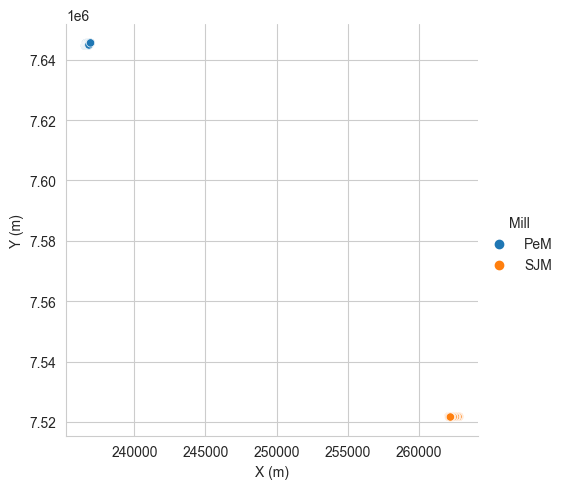

In [12]:
# sns.relplot(data=df, x= "X (m)", y="Y (m)", col="Mill", col_wrap=2, height=5, aspect=1.5)
sns.relplot(data=df, x= "X (m)", y="Y (m)", hue="Mill")

## Mill == **SJM**

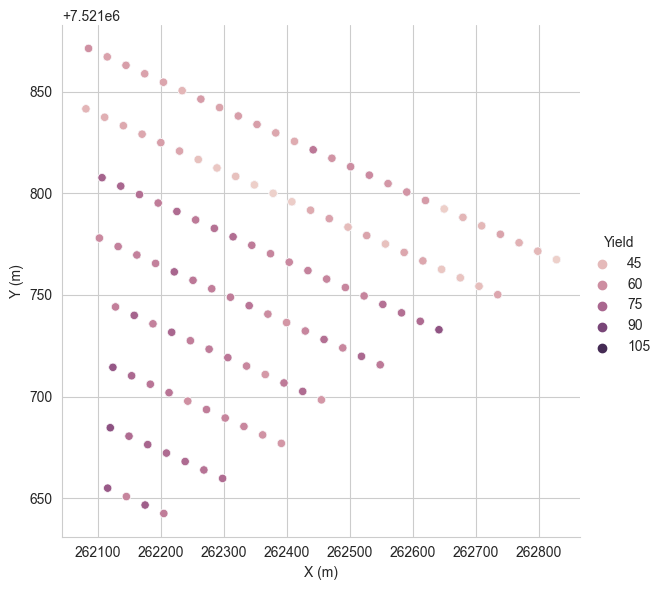

In [13]:
sns.relplot(data=df.loc[df["Mill"] == "SJM"], x= "X (m)", y="Y (m)", hue="Yield", height=6)

## Mill == **PEM**

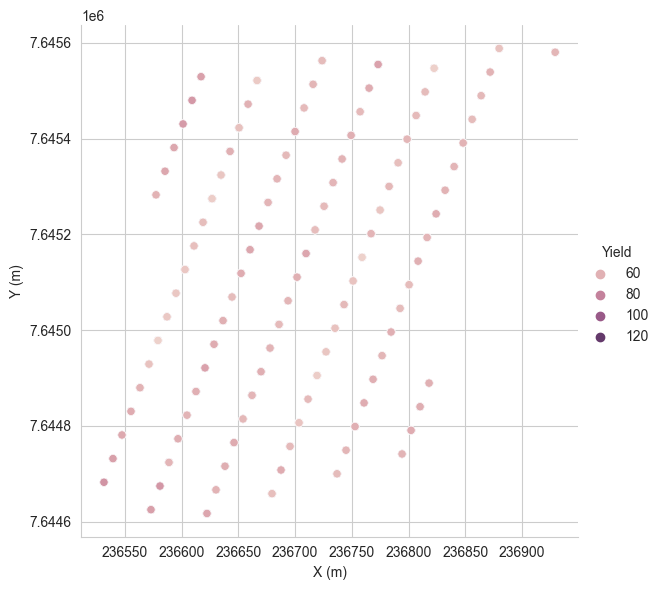

In [14]:
sns.relplot(data=df.loc[df["Mill"] == "PeM"], x= "X (m)", y="Y (m)", hue="Yield", height=6)

### Podemos observar que as usinas estão em lugares diferentes e consequentemente as outras variáveis são diferentes para cada usina. Então vamos remover a variável **Mill**, **Y (m)** e **X (m)**, já que a produtividade não é maior ou menor dependendo do nome da usina e sim dependendo das outras variáveis que são diferentes para cada usina. No caso de **Y (m)** e **X (m)**, a produtividade não é maior ou menor dependendo da posição da usina, mas sim dependendo das outras variáveis que são diferentes para cada uma.
### Obs. As variáveis **Y (m)** e **X (m)** são as coordenadas geográficas das amostras.

In [15]:
# Não irei remover a variável Mill ainda, pois ela será útil para algumas análises.
df.drop(["X (m)", "Y (m)"], inplace=True, axis=1)

## Analisando Season

In [16]:
df_func(df, "Season")

O número de valores únicos é: 4
Estes valores são: ['Plant' 'First Ratoon' 'Second Ratoon' 'Third Ratoon']
Quantidade de cada valor único:
Second Ratoon    224
Third Ratoon     117
Plant            107
First Ratoon     107
Name: Season, dtype: int64
Quantidade de valores nulos: 0


### Temos 4 tipos de cana-de-açucar, sendo elas **cana planta**, **primeiro corte**, **segundo corte** e **terceiro corte**

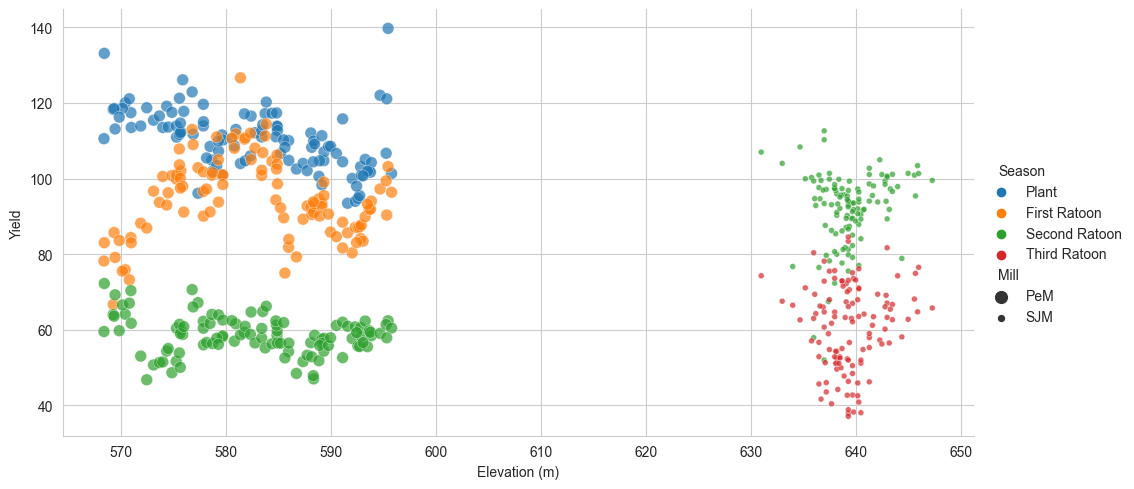

In [17]:
sns.relplot(data = df, y = 'Yield', x = 'Elevation (m)', hue="Season", size="Mill", height=5, aspect=2, alpha=0.7)
# plt.ylabel("Produtividade (t/ha)")
# plt.xlabel('Elevação (m)')

### Bem, este gráfico nos trás muitas informações, mas vamos focar na variável alvo, que é **Yield (t/ha)**. Podemos observar que a **cana planta** apresenta uma produtividade maior que os outros tipos de cana-de-açucar, e o **terceiro corte** apresenta uma produtividade menor que os outros tipos de cana-de-açucar. Com o campo **Elevation** no gráfico somos capazes de visualizar que as usinas estão em intervalos diferentes de elevação, sendo **PeM** a usina com menor elevação e **SJM** a usina com maior elevação, não é possível afirmar que a elevação influência na produtividade da cana-de-açucar.

In [18]:
df.groupby(['Season'])['Yield'].mean()

Season
First Ratoon      94.801065
Plant            110.431421
Second Ratoon     76.117071
Third Ratoon      60.466231
Name: Yield, dtype: float64

### A média de produtividade da cana-de-açucar segue o esperando, tendo maior produtividade na **cana planta** e menor produtividade no **terceiro corte**.

# 3 - Pré processamento dos dados

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import category_encoders
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [20]:
X = df.drop(["Yield", "Mill"], axis=1)
y = df["Yield"]

In [21]:
num_var = X.select_dtypes(include=['int64', 'float64']).columns
cat_var = X.select_dtypes(include=['object', 'bool']).columns

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.1 - Encontrando os melhores pré-processamentos para as variáveis numéricas e categóricas e o melhor modelo de regressão. 
### Usando pipeline e o for do python, vamos encontrar os melhores pré processamentos para as variáveis numéricas e categóricas e o melhor modelo de regressão.

In [23]:
t = [('num_continuas', StandardScaler(), num_var), 
     ('str_categoricas', category_encoders.CatBoostEncoder(), cat_var)]

preprocessor = ColumnTransformer(transformers=t)

### Cada lista pode conter mais de uma possibilidade, neste caso quis testar o tratamento de variáveis númericas com 3 métodos diferentes e a codificação de variáveis categóricas com 1 método, já em relação aos modelos, optei por testar 3.

In [24]:
ct_num = [StandardScaler(), MinMaxScaler(), RobustScaler()]
ct_cat = [category_encoders.CatBoostEncoder()]
modelos = [XGBRegressor(random_state=42), GradientBoostingRegressor(random_state=42), RandomForestRegressor(random_state=42)]

In [25]:
cont = len(ct_num)*len(ct_cat)*len(modelos) # definindo o número de iterações

### Criando uma lista para armazenar os resultados
lista_ct_num = []
lista_ct_cat = []
lista_modelos = []
lista_rmse = []

### Iniciando o for paraa avaliar as combinações
for i in ct_num:
    for a in ct_cat:
        for b in modelos:
            preprocessor = ColumnTransformer([('num_continuas', i, num_var), 
                                            ('str_categoricas', a, cat_var)])
            pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', b)])
            
            val_cruzada = KFold(n_splits=5, shuffle=True, random_state=42)
            score_p1 = cross_val_score(pipeline, X_train, y_train, cv=val_cruzada, scoring='neg_mean_squared_error')
            rmse = np.mean(np.sqrt(-score_p1))
                     
            lista_ct_num.append(i)
            lista_ct_cat.append(a)
            lista_modelos.append(b)
            lista_rmse.append(rmse)
            ### Analisando o melhor modelo com base no menor erro
            tmp = min(lista_rmse)
            index = lista_rmse.index(tmp)

print("O melhor modelo é: {}".format(lista_modelos[index]))
print("O melhor pré-processamento de variáveis númericas é: {}".format(lista_ct_num[index]))
print("O melhor pré-processamento de variáveis categóricas é: {}".format(lista_ct_cat[index]))
print("O menor erro é: {}".format(lista_rmse[index]))
            

O melhor modelo é: RandomForestRegressor(random_state=42)
O melhor pré-processamento de variáveis númericas é: StandardScaler()
O melhor pré-processamento de variáveis categóricas é: CatBoostEncoder()
O menor erro é: 7.694052928001189


### Com base no código acima podemos visulizar as melhores combinações de pré-processamento e modelo de regressão, sendo o **RandomForestRegressor** o melhor modelo e o **StandardScaler** para as variáveis numéricas e **OneHotEncoder** para as variáveis categóricas.
    O melhor modelo é: RandomForestRegressor(random_state=42)
    O melhor pré-processamento de variáveis númericas é: StandardScaler()
    O melhor pré-processamento de variáveis categóricas é: CatBoostEncoder()
    O menor erro é: 7.694052928001189 

# 4.0 Prevendo os valores de **Yield** com *RamdomForestRegressor* - Ajustando os hiperparâmetros do modelo utilizando *Optuna*.

In [26]:
import optuna
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

## 4.1 Criando à funcão objetito para o *Optuna*, está que será utilizada para ajustar os hiperparâmetros do modelo.
### Recomendo à leitura do seguinte artigo para entender melhor à função objetivo: https://towardsdatascience.com/why-is-everyone-at-kaggle-obsessed-with-optuna-for-hyperparameter-tuning-7608fdca337c\
### Temos que ter em mente que o "neg_mean_squared_error" no "cross_val_score" retornará valores de saída negativos, por isso é necessário multiplicar por -1 o score, já que queremos fazer à minimização do erro.


In [27]:
def objective(trial, X, y, cv, scoring):
        params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1500, step=100),
        "max_features": trial.suggest_categorical("max_features", ["auto", "sqrt"]),
        "max_depth": trial.suggest_int("max_depth", 3, 100),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "random_state": 1,
        }

        preprocessor_final = ColumnTransformer([('num_continuas', StandardScaler(), num_var), 
                                                ('str_categoricas', category_encoders.CatBoostEncoder(), cat_var)])
        pipeline_final = Pipeline(steps=[('preprocessor', preprocessor_final),('model', RandomForestRegressor(**params))])

        rmse = cross_val_score(pipeline_final, X, y, cv=cv, scoring=scoring)
        score = np.mean(np.sqrt(-rmse))
        
        return score
        

## 4.2 Criando à função study para o *Optuna* e definindo à métrica de avaliação do modelo.

In [28]:
study = optuna.create_study(direction="minimize")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
func = lambda trial: objective(trial, X_train, y_train, kf, "neg_mean_squared_error")

[I 2023-01-09 19:52:27,212] A new study created in memory with name: no-name-602692a2-b1e9-4501-bcb6-f7aee535a894


## 4.3 Defininindo às quantidades de ensaios.
### Resolvi começar com 50 trials. 
#### Como não houve uma melhora significativa no erro, resolvi aumentar o número de trials para 100. Entretanto, não houve diminuição no erro, então resolvi parar o ajuste dos hiperparâmetros, pois a relação custo-benefício não estava evidente.

### 4.3.1 - 50 trials

In [ ]:
study.optimize(func, n_trials=50, show_progress_bar=False)
print("Melhores parâmetros: {}".format(study.best_params))
print("Score: {}".format(study.best_value))

In [30]:
print("Melhores parâmetros: {}".format(study.best_params))
print("Score: {}".format(study.best_value))

Melhores parâmetros: {'n_estimators': 800, 'max_features': 'auto', 'max_depth': 74, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': True}
Score: 7.526324897874304


### 4.3.2 - 100 trials

In [ ]:
study.optimize(func, n_trials=50, show_progress_bar=False)
print("Melhores parâmetros: {}".format(study.best_params))
print("Score: {}".format(study.best_value))

In [32]:
print("Melhores parâmetros: {}".format(study.best_params))
print("Score: {}".format(study.best_value))

Melhores parâmetros: {'n_estimators': 700, 'max_features': 'auto', 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': True}
Score: 7.526087097763164


## 4.4 Visualizando os resultados do *Optuna* com o auxilio da biblioteca *Optuna.visualization*.

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_25040\1412238616.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study);


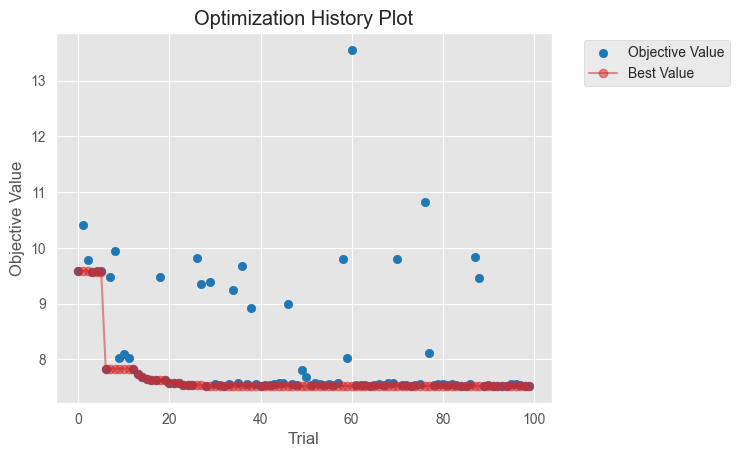

In [33]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study);

### Podemos notar que o erro começa em um valor superior e depois de alguns "ensaios" ele começa a diminuir, até chegar ao menor erro. Resolvi parar o ajuste com apenas 100 ensaios, pois não houve uma melhora significativa no erro se levarmos em conta o gasto computacional.

## 4.5 Visualizando os hiperparâmetros do modelo e suas respectivas importâncias.

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_25040\1756647795.py:3: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study);


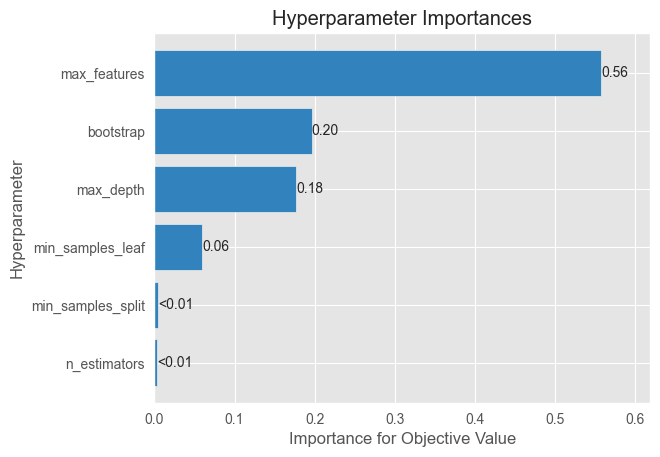

In [34]:
from optuna.visualization.matplotlib import plot_param_importances

plot_param_importances(study);

### O gráfico mostra à importância de cada hiperparâmetro para o modelo. Podemos observar que o hiperparâmetro **max_features** é o mais importante para o modelo, seguido do hiperparâmetro **bootstrap**.

# 5.0 Predizendos os valores de **Yield** com *RandomForestRegressor* e analisando o erro

## 5.1 Adicionei no Pipeline um metódo de feature selecion, baseado no *f_regression* (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression).

In [35]:
# Nome das colunas
x_name_columns = X_train.columns

In [36]:
# Preparando o pipeline, com os melhore hiperparâmetros e pré-processamentos.
preprocessor_final = ColumnTransformer([('num_continuas', StandardScaler(), num_var), 
                                        ('str_categoricas', category_encoders.CatBoostEncoder(), cat_var)])

pipeline_rfg_tunning = Pipeline(steps=[
    ('preprocessor', preprocessor_final),
    ('feature_selection', SelectKBest(f_regression, k=10)),
    ('model', RandomForestRegressor(**study.best_params))])

In [37]:
pipeline_rfg_tunning.fit(X_train, y_train)
pipeline_rfg_tunning.score(X_test, y_test)
y_pred = pipeline_rfg_tunning.predict(X_test)

c:\Users\Guilherme\anaconda3\envs\curso_datascience\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [38]:
pipeline_rfg_tunning.steps

[('preprocessor',
  ColumnTransformer(transformers=[('num_continuas', StandardScaler(),
                                   Index(['Elevation (m)', 'Slope (%)', 'Clay', 'Sand', 'Silt', 'OM', 'pH', 'P',
         'K', 'Ca', 'Mg', 'H+Al', 'SEB', 'CEC', 'BS', 'B', 'Cu', 'Fe', 'Mn'],
        dtype='object')),
                                  ('str_categoricas', CatBoostEncoder(),
                                   Index(['Season'], dtype='object'))])),
 ('feature_selection',
  SelectKBest(score_func=<function f_regression at 0x000001934FA5FDC0>)),
 ('model',
  RandomForestRegressor(max_depth=12, max_features='auto', min_samples_split=3,
                        n_estimators=700))]

## 5.2 Analisando as features selecionadas pelo *f_regression* e a importância delas para o modelo.

### 5.2.1 - Features selecionadas pelo *f_regression*

In [39]:
# pipeline_rfg_tunning.steps[1][1].get_support(indices=True) # retorna os índices das colunas selecionadas
feature_names = X_train.iloc[:, pipeline_rfg_tunning.steps[1][1].get_support(indices=True)].columns.to_list()
print(feature_names)

['Elevation (m)', 'Season', 'Silt', 'P', 'Mg', 'CEC', 'BS', 'B', 'Fe', 'Mn']


### 5.2.2 - Importância das features selecionadas pelo *f_regression* para o modelo.

Text(0, 0.5, 'Importância')

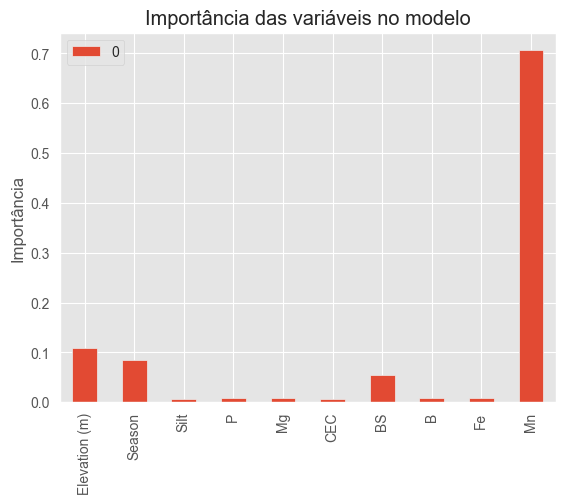

In [40]:
importance = pipeline_rfg_tunning.steps[2][1].feature_importances_
df_importance = pd.DataFrame(importance, index=feature_names)

fig, ax = plt.subplots()
df_importance.plot.bar(ax=ax)
ax.set_title("Importância das variáveis no modelo")
ax.set_ylabel("Importância")

### A variável **Mn** foi a que apresentou maior importância para o modelo, seguida da variável **Elevation (m)** e **Season**.

## 5.3 Métricas de avaliação do modelo.

In [41]:
r = r2_score(y_test, y_pred) #coeficiente de determinação
mae = mean_absolute_error(y_test, y_pred) #erro médio absoluto
mse = mean_squared_error(y_test, y_pred) #erro médio quadrático
rmse = np.sqrt(mse) #raiz do erro médio quadrático

print("O valor médio do alvo é de: {}".format(np.mean(y_test)))
print("O coeficiente de determinação é de: {}%".format(r*100))
print("O erro médio absoluto é de: {}".format(mae))
print("O erro médio quadrático é de: {}".format(mse))
print("A raiz do erro médio quadrático é de: {}".format(rmse))

O valor médio do alvo é de: 85.70793693693692
O coeficiente de determinação é de: 85.10790138701073%
O erro médio absoluto é de: 6.00981577052825
O erro médio quadrático é de: 76.93837264256142
A raiz do erro médio quadrático é de: 8.771452139900292


### **R²** ou coeficiente de determinação: Este valor pode variar de 0 e 1 e representa o percentual da variância da variável alvo que é explicada pelos atributos. Quanto mais próximo de 1, melhor o modelo se comparado a outro.
### **MSE ou erro quadrático médio**: Este valor pode variar de 0 e infinito e representa o erro médio do modelo. Quanto mais próximo de 0, melhor o modelo se comparado a outro.
### **RMSE ou raiz do erro quadrático médio**: Este valor é a raiz quadrada do MSE e pode variar de 0 e infinito. Quanto mais próximo de 0, melhor o modelo se comparado a outro. O RMSE é uma medida de erro mais popular que o MSE, pois o RMSE é interpretado na mesma unidade da variável alvo.
![](MSE.jpg)
### **MAE ou erro absoluto médio**: Este valor pode variar de 0 e infinito e representa o erro médio absoluto do modelo. Quanto mais próximo de 0, melhor o modelo se comparado a outro.
![](MAE.jpg)
### A diferença entre o RMSE e o MAE é que o RMSE calcula à média do quadrado dos erros antes de calcular a raiz quadrada, desta maneira erros maiores são mais penalizados, ou seja, o RMSE é mais sensível à outliers se comparado ao MAE


### 5.3.1 - Analisando à distribuição dos resíduos em relação ao valor predito.

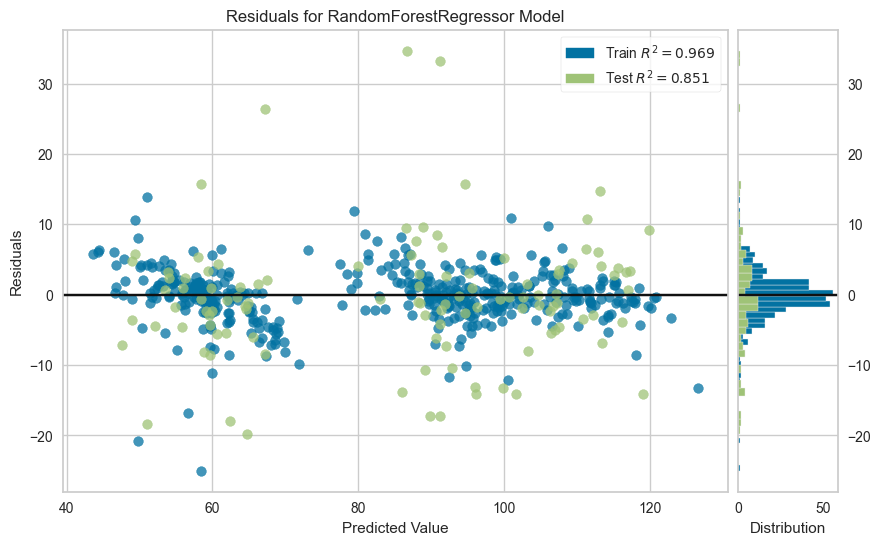

<AxesSubplot: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [42]:
from yellowbrick.regressor import ResidualsPlot, PredictionError
fig, ax = plt.subplots(figsize=(10, 6))
rpv = ResidualsPlot(pipeline_rfg_tunning, ax=ax)
rpv.fit(X_train, y_train)
rpv.score(X_test, y_test)
rpv.poof()

### 5.3.2 - Analisando à distribuição dos resíduos em relação ao valor real nos dados de teste. Note que quanto mais próximo da diagononal principal, menor o erro.

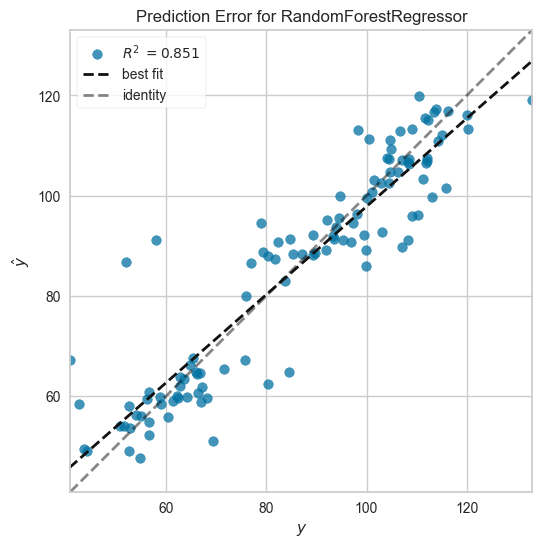

<AxesSubplot: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
pev = PredictionError(pipeline_rfg_tunning, ax=ax)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### Exportando o dataset apenas com as 10 variáveis selecionadas pelo feature selection

In [ ]:
df_limpo = X_train.iloc[feature_names]
df_limpo.to_csv("Dataset_limpo", index=False)

# Conclusão
### O modelo de *RandomForestRegressor* foi o melhor modelo para predizer os valores de **Yield**. Além disso, pudemos ver que o *Optuna* foi uma ferramenta muito útil para ajustar os hiperparâmetros do modelo, pois foi possível diminuir o erro do modelo. Por fim, pudemos ver que o *f_regression* foi uma ferramenta muito útil para selecionar as features mais importantes para o modelo, diminuindo sua complexidade e consequentemente o risco de sobreajuste.